# Customer Churn Prediction using Machine Learning
## Problem Statement
The objective of this project is to build a machine learning model that predicts
whether a bank customer is likely to exit (churn) based on their demographic,
financial, and behavioral attributes.
## Dataset Description
The dataset contains customer information such as age, credit score, balance,
geography, gender, and product usage. The target variable `Exited` indicates
whether a customer has left the bank.

## Libraries and Tools Used
- Python
- Pandas, NumPy
- Matplotlib
- Scikit-learn

In [163]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

## Data Loading
The dataset is loaded using Pandas and initial inspection is performed to
understand the structure, data types, and presence of missing values.

In [145]:
df = pd.read_csv('churn.csv')

In [147]:
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,0,7,0.00,2,1,1,10062.80,0


In [149]:
df.shape

(10000, 14)

In [151]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.864000,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.589604,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Data Cleaning
- Removed identifier columns such as RowNumber, CustomerId, and Surname
- Converted data types where necessary
- Verified absence of missing values

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [155]:
df['Age'] = df['Age'].replace(0, np.nan)
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                15
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [157]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

## Exploratory Data Analysis
Exploratory analysis was conducted to understand relationships between features
and customer churn using summary statistics and visualizations.


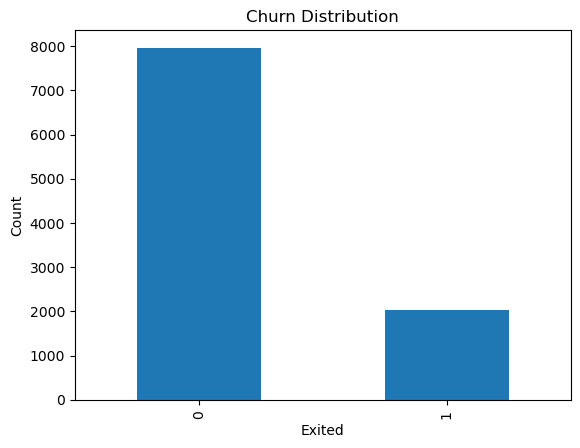

In [159]:
df['Exited'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

## Feature Selection and Target Definition
The target variable `Exited` was separated from the feature set. Numerical and
categorical features were identified for appropriate preprocessing.


In [116]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [118]:
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

## Data Preprocessing
- Numerical features were imputed using median values and scaled using StandardScaler
- Categorical features were imputed using the most frequent values and encoded
  using OneHotEncoder
- ColumnTransformer was used to apply transformations efficiently


In [120]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    #('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

## Train-Test Split
The dataset was split into training and testing sets to evaluate model
performance on unseen data.


In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Building
A machine learning pipeline was created using preprocessing steps followed by Logistic Regression and Decision Tree Classifier to predict customer churn.

In [182]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [184]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [186]:
y_pred = model.predict(X_test)
print("Accuracy LR:", accuracy_score(y_test, y_pred))

Accuracy LR: 0.811


In [188]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy DT:", accuracy_score(y_test, y_pred))

Accuracy DT: 0.7805


In [190]:
feature_names = model.named_steps['preprocessing'] \
    .get_feature_names_out()

In [192]:
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': model.named_steps['classifier'].feature_importances_
})

importance_df = importance_df.sort_values(by='importance', ascending=False)
importance_df.head(10)

,feature,importance
1,num__Age,0.217341
7,num__EstimatedSalary,0.161056
3,num__Balance,0.155652
0,num__CreditScore,0.142729
4,num__NumOfProducts,0.119269
6,num__IsActiveMember,0.068525
2,num__Tenure,0.066697
9,cat__Geography_Germany,0.020831
5,num__HasCrCard,0.012384
8,cat__Geography_France,0.010218


## Feature Importance Analysis
Feature importance analysis revealed that Age, Estimated Salary, Balance,
Credit Score, and Number of Products were the most influential factors in
predicting customer churn.


## Business Insights
- Older customers exhibit a higher likelihood of churn
- Customers with higher balances are more prone to exit
- Active members are less likely to churn
- Geographic differences influence customer retention


## Conclusion
This project demonstrates an end-to-end machine learning workflow including
data cleaning, feature selection, preprocessing using pipelines, model training,
and interpretation of results through feature importance analysis.


## Future Improvements
- Hyperparameter tuning for model optimization
- Trying advanced models such as Gradient Boosting
- Deploying the model using a web framework
